# theDevMasters, Day 4:<br> Machine Learning Classification

Company Name : theDevMasters <br>
Author: Cloris Li <br>
Reviewed: Zia Khan <br>
MDS-DL Document Version : 1.0 <br>

Description : Day 4, Machine Learning Classification

# <font color="blue">Table of Contents</font>

## Classfication
_**Use Case: HR Employee Turnover**_
1. Probabilistic-based:
    * Naïve Bayes Classifier
2. Group-Based:
    * K-Nearest Neighbors Classifier
3. Maximum Entropy-Based:
    * Logistic Regression
4. Tree-based:
    * Decision Tree Classifier
5. Ensemble-based:
    * Random Forest Classifier
    * Gradient Boost Classifier

## Model Evaluation for Classification Algorithms
* Accuracy score, Precision score, Recall score, F-1 score
* Confusion Matrix
* ROC curves and AUC

## Project: Titanic Survival Prediction
* Project description

# <font color="red">I. Classification </font>

In Machine Learning, **Classification** is the problem of identifying to which of a set of categories (sub-populations) a new observation belongs, on the basis of a training set of data containing observations (or instances) whose category membership is known.

It it about predicting a qualitative output from p inputs of arbitrary types (quantitative and/or qualitative).

## <font color="green">_Use Case - HR Employee Turnover<br>Data Setup_</font>

In [1]:
import pandas as pd
pd.set_option("display.max_columns",100)

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
df=pd.read_csv("hr_data.csv")

# EDA

In [4]:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,2,5993.0,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,1,5130.0,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,2,2090.0,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,1,2909.0,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,1,3468.0,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,No


In [5]:
df.shape

(1470, 35)

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,1.764626,6486.253519,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,0.790757,4674.776463,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,2851.500000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,5157.500000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,2.000000,8265.509696,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,3.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
df.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [8]:
df.isnull().sum()

Age                           0
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInC

In [9]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,-0.035466,0.497436,0.028051,0.299635,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,-0.005724,0.012307,-0.032182,0.038153,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.021916,-0.016248,0.027473,-0.029251,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,-0.000107,0.095570,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.047224,-0.015985,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,0.022628,-0.002227,0.037600,0.012594,-0.031701,-0.029548,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.026198,-0.017471,-0.015297,0.022157,-0.009062,-0.002172,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.009005,-0.015469,-0.016322,0.015012,-0.017205,-0.029071,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,-0.012346,0.955063,0.039563,0.142501,-0.034730,-0.021222,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


In [10]:
df["Attrition"].value_counts()

No     1020
Yes     185
Name: Attrition, dtype: int64

In [11]:
df["Attrition"]

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465    NaN
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

# Feature Engineering

In [12]:
df["Attrition"].replace(["Yes","No"],[1,0],inplace=True)

In [13]:
df["Attrition"].value_counts()

0.0    1020
1.0     185
Name: Attrition, dtype: int64

In [14]:
bos=df[df["Attrition"].isnull()]
dolu=df[df["Attrition"].notnull()]
len(bos),len(dolu)

(265, 1205)

In [15]:
x=dolu.drop("Attrition",axis=1)
y=dolu.Attrition

In [16]:
y

0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
1439    0.0
1466    0.0
1467    0.0
1468    0.0
1469    0.0
Name: Attrition, Length: 1205, dtype: float64

In [17]:
x=pd.get_dummies(x,drop_first=True)
x.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,4,2,5993.0,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,49,279,8,1,1,2,3,61,2,2,2,1,5130.0,24907,1,23,4,4,80,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,37,1373,2,2,1,4,4,92,2,1,3,2,2090.0,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1
3,33,1392,3,4,1,5,4,56,3,1,3,1,2909.0,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,27,591,2,1,1,7,1,40,3,1,2,1,3468.0,16632,9,12,3,4,80,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0


In [18]:
x.shape

(1205, 46)

### <font color="green">Q: What is the goal for our use case today?</font>

## 1.1 Naive Bayes Classifier
The **Naive Bayes algorithm** is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. 

It is based on the Bayes Theorem for calculating probabilities and conditional probabilities. Naive Bayes model is easy to build and particularly useful for very large data sets. Along with simplicity, Naive Bayes is known to outperform even highly sophisticated classification methods.

**Pros:** It perform well in case of categorical input variables compared to numerical variable(s). For numerical variable, normal distribution is assumed (bell curve, which is a strong assumption).

**Cons:** On the other side Naive Bayes is also known as a bad estimator, so the probability outputs from predict_proba are not to be taken too seriously. Another limitation of Naive Bayes is the assumption of independent predictors. In real life, it is almost impossible that we get a set of predictors which are completely independent.

* Gaussian Naive Bayes is used in classification and it assumes that features follow a normal distribution.
* Bernoullie Naive Bayes is useful if your feature vectors are binary (i.e. zeros and ones).

In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
g=GaussianNB()
b=BernoulliNB()

In [20]:
g.fit(x,y)

GaussianNB()

In [21]:
b.fit(x,y)

BernoulliNB()

In [22]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,confusion_matrix,classification_report


In [23]:
tahmin1=g.predict(x)
tahmin2=b.predict(x)

In [24]:
accuracy_score(y,tahmin1),precision_score(y,tahmin1),f1_score(y,tahmin1),recall_score(y,tahmin1)

(0.808298755186722, 0.4228187919463087, 0.5217391304347826, 0.6810810810810811)

In [25]:
accuracy_score(y,tahmin2),precision_score(y,tahmin2),f1_score(y,tahmin2),recall_score(y,tahmin2)

(0.8448132780082988,
 0.49122807017543857,
 0.37458193979933113,
 0.3027027027027027)

In [26]:
confusion_matrix(y,tahmin1)

array([[848, 172],
       [ 59, 126]])

In [27]:
print(classification_report(y,tahmin1))

              precision    recall  f1-score   support

         0.0       0.93      0.83      0.88      1020
         1.0       0.42      0.68      0.52       185

    accuracy                           0.81      1205
   macro avg       0.68      0.76      0.70      1205
weighted avg       0.86      0.81      0.83      1205



In [28]:
print(classification_report(y,tahmin2))

              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      1020
         1.0       0.49      0.30      0.37       185

    accuracy                           0.84      1205
   macro avg       0.69      0.62      0.64      1205
weighted avg       0.82      0.84      0.83      1205



In [29]:
from sklearn.neighbors import KNeighborsClassifier
k = KNeighborsClassifier()
k.fit(x,y)

KNeighborsClassifier()

In [30]:
tahmin3=k.predict(x)

In [31]:
accuracy_score(y,tahmin3),precision_score(y,tahmin3),f1_score(y,tahmin3),recall_score(y,tahmin3)

(0.8556016597510373,
 0.627906976744186,
 0.2368421052631579,
 0.14594594594594595)

In [32]:
confusion_matrix(y,tahmin3)

array([[1004,   16],
       [ 158,   27]])

In [33]:
print(classification_report(y,tahmin3))

              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92      1020
         1.0       0.63      0.15      0.24       185

    accuracy                           0.86      1205
   macro avg       0.75      0.57      0.58      1205
weighted avg       0.83      0.86      0.82      1205



In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [35]:
df=sns.load_dataset("iris")

In [36]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [37]:
df.shape

(150, 5)

In [38]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [39]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

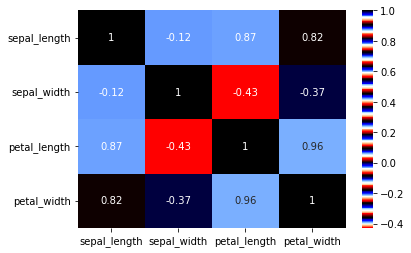

In [40]:
sns.heatmap(df.corr(),annot=True,cmap="flag");

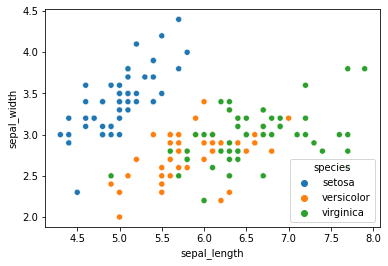

In [41]:
sns.scatterplot(x="sepal_length",y="sepal_width",hue="species",data=df);

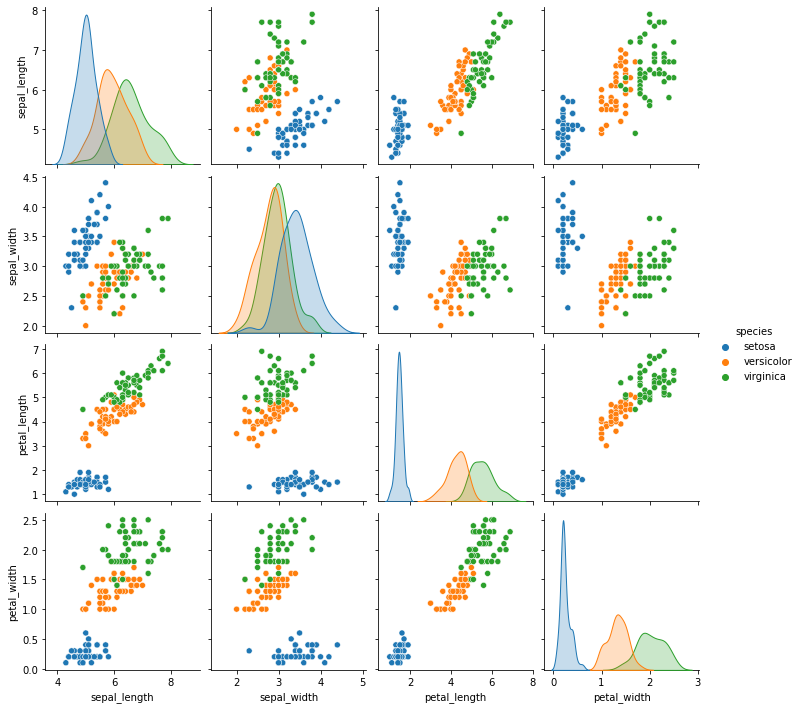

In [42]:
sns.pairplot(df,hue="species");

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x=df.drop("species",axis=1)
y=df.species

In [76]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [77]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 150 entries, 0 to 149
Series name: species
Non-Null Count  Dtype 
--------------  ----- 
150 non-null    object
dtypes: object(1)
memory usage: 1.3+ KB


In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=101)

In [46]:
from sklearn.svm import SVC

In [47]:
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [48]:
y_pred=svc.predict(x_test)

In [49]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0, 17,  0],
       [ 0,  0, 11]])

In [50]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n      setosa       1.00      1.00      1.00        10\n  versicolor       1.00      1.00      1.00        17\n   virginica       1.00      1.00      1.00        11\n\n    accuracy                           1.00        38\n   macro avg       1.00      1.00      1.00        38\nweighted avg       1.00      1.00      1.00        38\n'

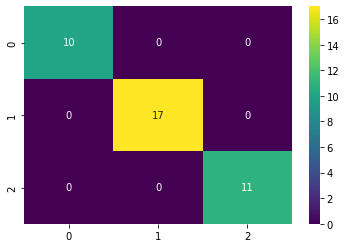

In [51]:
sns.heatmap(confusion_matrix(y_test,y_pred),cmap="viridis",annot=True);

In [52]:
accuracy_score(y_test,y_pred)

1.0

In [53]:
from sklearn.neighbors import KNeighborsClassifier
K=KNeighborsClassifier()

In [54]:
k.fit(x_train,y_train)

KNeighborsClassifier()

In [55]:
y_pred=k.predict(x_test)

In [56]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0, 17,  0],
       [ 0,  0, 11]])

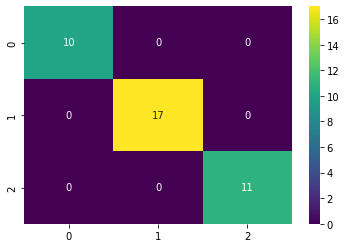

In [57]:
sns.heatmap(confusion_matrix(y_test,y_pred),cmap="viridis",annot=True);

In [58]:
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()

In [59]:
d.fit(x_train,y_train)

DecisionTreeClassifier()

In [74]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 94 to 95
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  112 non-null    float64
 1   sepal_width   112 non-null    float64
 2   petal_length  112 non-null    float64
 3   petal_width   112 non-null    float64
dtypes: float64(4)
memory usage: 4.4 KB


In [75]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 112 entries, 94 to 95
Series name: species
Non-Null Count  Dtype 
--------------  ----- 
112 non-null    object
dtypes: object(1)
memory usage: 1.8+ KB


In [73]:
x_test

,sepal_length,sepal_width,petal_length,petal_width
33,5.5,4.2,1.4,0.2
16,5.4,3.9,1.3,0.4
43,5.0,3.5,1.6,0.6
129,7.2,3.0,5.8,1.6
50,7.0,3.2,4.7,1.4
123,6.3,2.7,4.9,1.8
68,6.2,2.2,4.5,1.5
53,5.5,2.3,4.0,1.3
146,6.3,2.5,5.0,1.9
1,4.9,3.0,1.4,0.2


In [60]:
y_pred=d.predict(x_test)

In [67]:
y_pred

array(['setosa', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor'], dtype=object)

In [61]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 10]])

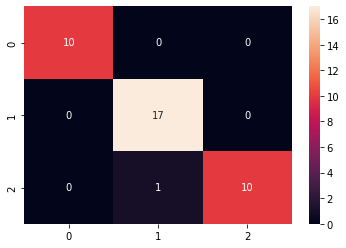

In [62]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True);

### <font color="green">Q: What scenarios do we usually use Naive Bayes for?</font>

## 1.2 K-Nearest Neighbors
The **K-Nearest Neighbors (KNN) algorithm** is non-parametric, instance-based and used in a supervised learning setting. It is simple to understand and easy to implement, and can be used to solve both classification and regression problems. However, the algorithm gets significantly slower as the number of examples and/or predictors/independent variables increase.

KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression).

In [63]:
from sklearn.neighbors import KNeighborsClassifier


### <font color="green">Q: In your own words, describe the K-Nearest Neighbors Classifier algorithm.</font>

## 1.3 Logistic Regression
**Logistic regression** (aka logit regression or logit model) is a classification algorithm where the response variable Y is categorical. Logistic regression allows us to estimate the probability of a categorical response based on one or more predictor variables (X). 

It transforms its output using the logistic sigmoid function to return a probability value which can then be mapped to two or more discrete classes. It allows one to say that the presence of a predictor increases (or decreases) the probability of a given outcome by a specific percentage.

It is the go-to method for binary classification problems. The assumptions made by logistic regression about the distribution and relationships in your data are much the same as the assumptions made in linear regression.

In [64]:
from sklearn.linear_model import LogisticRegression


### <font color="green">Q: In your own words, describe the logistic regression process.</font>

## 1.4 Decision Tree Classifier
Tree based learning algorithms are considered to be one of the best and mostly used supervised learning methods. Tree based methods empower predictive models with high accuracy, stability and ease of interpretation.

**Decision tree** is a type of supervised learning algorithm (having a pre-defined target variable) that is mostly used in classification problems. It works for both categorical and continuous input and output variables. In this technique, we split the population or sample into two or more homogeneous sets (or sub-populations) based on most significant splitter / differentiator in input variables.
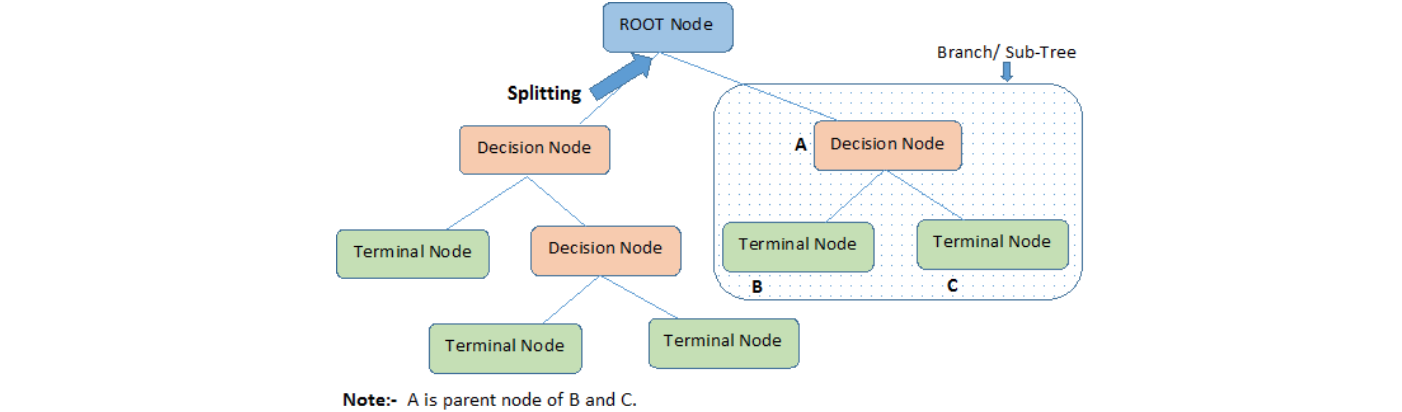

In [65]:
from sklearn.tree import DecisionTreeClassifier


### <font color="green">Q: In your own words, what is a node, branch and leaf?</font>

### How to Visualize Tree-Based Models
Please make sure to have Graphviz installed properly.

In [66]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(d, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('attrition.png')

ModuleNotFoundError: No module named 'sklearn.externals.six'

## 1.5 Ensembled Models
Ensemble methods, which combines several decision trees to produce better predictive performance than utilizing a single decision tree. The main principle behind the ensemble model is that a group of weak learners come together to form a strong learner.

Ensemble methods involve group of predictive models to achieve a better accuracy and model stability.

Two common techniques for ensembled methods:
* Bagging: Random Forest Classifier
* Boosting: Gradient Boost Classifier

### 1.5.1 Random Forest Classifier (Bagging)
**Bagging** (Bootstrap Aggregation) is used when our goal is to reduce the variance of a decision tree. Here idea is to create several subsets of data from training sample chosen randomly with replacement. Now, each collection of subset data is used to train their decision trees. As a result, we end up with an ensemble of different models. Average of all the predictions from different trees are used which is more robust than a single decision tree.

**Random Forest** is an extension over bagging. It takes one extra step where in addition to taking the random subset of data, it also takes the random selection of features rather than using all features to grow trees. When you have many random trees. It’s called Random Forest

**Advantages** of using Random Forest technique:
* Handles higher dimensionality data very well.
* Handles missing values and maintains accuracy for missing data.

**Disadvantages** of using Random Forest technique:
* Since final prediction is based on the mean predictions from subset trees, it won’t give precise values for the regression model.

In [ ]:
from sklearn.ensemble import RandomForestClassifier


### 1.5.2 Gradient Boost Classifier (Boosting)
**Boosting** is another ensemble technique to create a collection of predictors. In this technique, learners are learned sequentially with early learners fitting simple models to the data and then analyzing data for errors. In other words, we fit consecutive trees (random sample) and at every step, the goal is to solve for net error from the prior tree.

**Gradient Boosting** is an extension over boosting method. _**Gradient Boosting = Gradient Descent + Boosting**_.
It uses gradient descent algorithm which can optimize any differentiable loss function. An ensemble of trees are built one by one and individual trees are summed sequentially. Next tree tries to recover the loss (difference between actual and predicted values).

**Advantages** of using Gradient Boosting technique:
* Supports different loss function.
* Works well with interactions.

**Disadvantages** of using Gradient Boosting technique:
* Prone to over-fitting.
* Requires careful tuning of different hyper-parameters

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


# <font color="red">II. Model Evaluation for Classification </font>

**Confusion Matrix:**<br>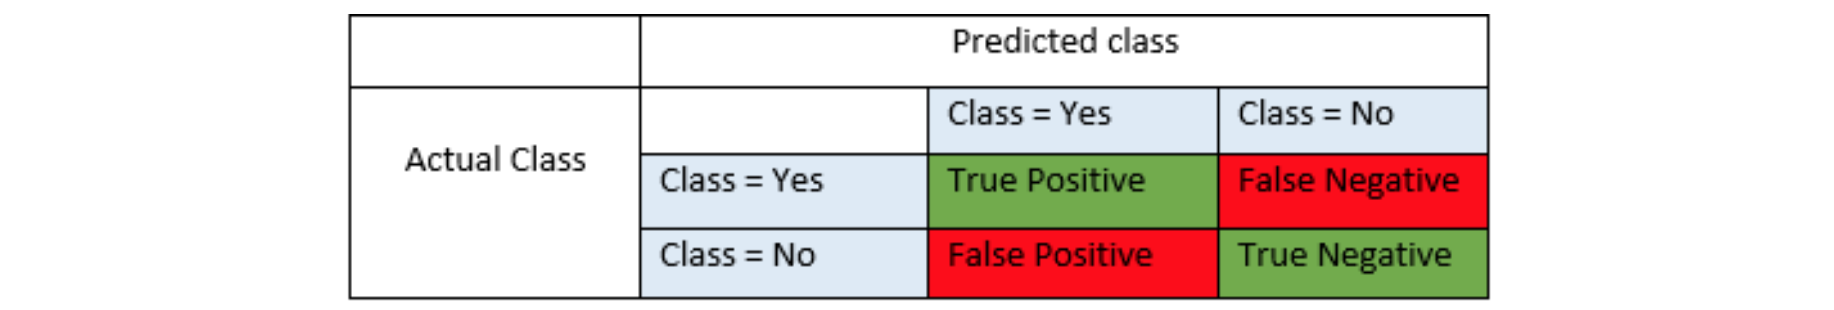

**Accuracy** - Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. One may think that, if we have high accuracy then our model is best. Yes, accuracy is a great measure but only when you have symmetric datasets where values of false positive and false negatives are almost same. Therefore, you have to look at other parameters to evaluate the performance of your model. For our model, we have got 0.803 which means our model is approx. 80% accurate.

Accuracy = TP+TN/TP+FP+FN+TN

**Precision** - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all passengers that labeled as survived, how many actually survived? High precision relates to the low false positive rate. We have got 0.788 precision which is pretty good.

Precision = TP/TP+FP

**Recall (Sensitivity)** - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the passengers that truly survived, how many did we label? We have got recall of 0.631 which is good for this model as it’s above 0.5.

Recall = TP/TP+FN

**F1 score** - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. In our case, F1 score is 0.701.

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

## <font color="green">_Use Case - HR Employee Turnover<br>Model Evaluation_</font>

In [ ]:
algorithms = [g,b,k,log,d,r,gbc]
names = ['GaussianNB', 'BernoulliNB', 'K Nearest', 'Logistic', 'Single Tree', 'Random Forest', 'Gradient Boost']

In [ ]:
def evaluate_model(X = features, y = target, algorithms = algorithms, names = names):
    # fit the data
    for i in range(len(algorithms)):
        algorithms[i] = algorithms[i].fit(X, y)
    # print metrics
    accuracy = []
    precision = []
    recall = []
    f1 = []
    for i in range(len(algorithms)):
        if accuracy_score(y, algorithms[i].predict(X)) == 1:
            accuracy.append(0)
        else:   
            accuracy.append(accuracy_score(y, algorithms[i].predict(X)))
        if precision_score(y, algorithms[i].predict(X)) == 1:
            precision.append(0)
        else:   
            precision.append(accuracy_score(y, algorithms[i].predict(X)))
        if recall_score(y, algorithms[i].predict(X)) == 1:
            recall.append(0)
        else:   
            recall.append(accuracy_score(y, algorithms[i].predict(X)))
        if f1_score(y, algorithms[i].predict(X)) == 1:
            f1.append(0)
        else:   
            f1.append(accuracy_score(y, algorithms[i].predict(X)))
    metrics = pd.DataFrame(columns = ['Accuracy', 'Precision', 'Recall', 'F1'], index = names)
    metrics['Accuracy'] = accuracy
    metrics['Precision'] = precision
    metrics['Recall'] = recall
    metrics['F1'] = f1
    return metrics.sort_values('Accuracy', ascending = False)

In [ ]:
evaluate_model()

### <font color="green">Q: From the results, which algorithm performs the best?</font>

### <font color="green">Q: What can you conclude from the confusion matrix?</font>

### <font color="green">Q: What can you see from the classification report?</font>

## <font color="green">_Use Case - HR Employee Turnover<br>Implementing the Model_</font>

### <font color="green">Q: What can you conclude from the results?</font>

# <font color="red">III. Project: Titanic Survival Prediction </font>

* Data: train.csv and test.csv
* Objective: Predict which passengers are more likely to survive